In [1]:
# dependencies
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# read in the aggregated data
aggregate_df = pd.read_csv('AGGREGATE.csv')

In [3]:
# create aggregate DataFrame
aggregate_df = pd.DataFrame(aggregate_df)

In [4]:
# create year column header to the aggregate DataFrame
aggregate_df['Year'] = pd.DatetimeIndex(aggregate_df['Date']).year


In [5]:
# remove the decimal from the year column
aggregate_df['Year'] = aggregate_df['Year'].fillna(0).astype(int)


In [6]:
# remove the colums that are not needed
aggregate_df = aggregate_df.drop(['Composite_HPI_SA','Single_Family_HPI_SA','One_Storey_HPI_SA','Two_Storey_HPI_SA','Townhouse_HPI_SA','Apartment_HPI_SA'], axis=1)

In [7]:
# remove the NaN values
aggregate_df = aggregate_df.dropna()

In [8]:
# convert columns to float
aggregate_df['Year'] = aggregate_df['Year'].astype(float)

In [9]:
# created monthly growth rate headers
aggregate_df['composite_growth_rate'] = aggregate_df['Composite_Benchmark_SA'] / aggregate_df['Composite_Benchmark_SA'].shift(1) - 1
aggregate_df['single_family_growth_rate'] = aggregate_df['Single_Family_Benchmark_SA'] / aggregate_df['Single_Family_Benchmark_SA'].shift(1) - 1
aggregate_df['one_storey_growth_rate'] = aggregate_df['One_Storey_Benchmark_SA'] / aggregate_df['One_Storey_Benchmark_SA'].shift(1) - 1
aggregate_df['two_storey_growth_rate'] = aggregate_df['Two_Storey_Benchmark_SA'] / aggregate_df['Two_Storey_Benchmark_SA'].shift(1) - 1
aggregate_df['townhouse_growth_rate'] = aggregate_df['Townhouse_Benchmark_SA'] / aggregate_df['Townhouse_Benchmark_SA'].shift(1) - 1
aggregate_df['apartment_growth_rate'] = aggregate_df['Apartment_Benchmark_SA'] / aggregate_df['Apartment_Benchmark_SA'].shift(1) - 1


In [10]:
# format the growth rate to percentage
aggregate_df['composite_growth_rate'] = aggregate_df['composite_growth_rate'] * 100
aggregate_df['single_family_growth_rate'] = aggregate_df['single_family_growth_rate'] * 100
aggregate_df['one_storey_growth_rate'] = aggregate_df['one_storey_growth_rate'] * 100
aggregate_df['two_storey_growth_rate'] = aggregate_df['two_storey_growth_rate'] * 100
aggregate_df['townhouse_growth_rate'] = aggregate_df['townhouse_growth_rate'] * 100
aggregate_df['apartment_growth_rate'] = aggregate_df['apartment_growth_rate'] * 100

In [11]:
# format the growth rate to 2 decimal places
aggregate_df['composite_growth_rate'] = aggregate_df['composite_growth_rate'].round(2)
aggregate_df['single_family_growth_rate'] = aggregate_df['single_family_growth_rate'].round(2)
aggregate_df['one_storey_growth_rate'] = aggregate_df['one_storey_growth_rate'].round(2)
aggregate_df['two_storey_growth_rate'] = aggregate_df['two_storey_growth_rate'].round(2)
aggregate_df['townhouse_growth_rate'] = aggregate_df['townhouse_growth_rate'].round(2)
aggregate_df['apartment_growth_rate'] = aggregate_df['apartment_growth_rate'].round(2)

In [12]:
# create a DataFrame for just the year 2020 to 2023
aggregate_df_2020_2023 = aggregate_df[aggregate_df['Year'] >= 2020]

In [13]:
# create a DataFrame for just the year 2016 to 2019
aggregate_df_2016_2019 = aggregate_df[(aggregate_df['Year'] >= 2016) & (aggregate_df['Year'] <= 2019)]

Hypthesis Test

Null Hypothesis: There is no statistically significant difference between the mean growth rate of real estate prices before and after January 2020 in all of the following categories: single family, one storey, two storey, townhouse and apartment.

Alternative Hypothesis: There is a statistically significant difference between the mean growth rate of real estate prices before and after January 2020 in all of the following categories: single family, one storey, two storey, townhouse and apartment.


In [14]:
# paired t-test aggregate_df_2020_2023 and aggregate_df_2016_2019
composite_ttest = stats.ttest_rel(aggregate_df_2020_2023['composite_growth_rate'], aggregate_df_2016_2019['composite_growth_rate'])
single_family_ttest = stats.ttest_rel(aggregate_df_2020_2023['single_family_growth_rate'], aggregate_df_2016_2019['single_family_growth_rate'])
one_storey_ttest = stats.ttest_rel(aggregate_df_2020_2023['one_storey_growth_rate'], aggregate_df_2016_2019['one_storey_growth_rate'])
two_storey_ttest = stats.ttest_rel(aggregate_df_2020_2023['two_storey_growth_rate'], aggregate_df_2016_2019['two_storey_growth_rate'])
townhouse_ttest = stats.ttest_rel(aggregate_df_2020_2023['townhouse_growth_rate'], aggregate_df_2016_2019['townhouse_growth_rate'])
apartment_ttest = stats.ttest_rel(aggregate_df_2020_2023['apartment_growth_rate'], aggregate_df_2016_2019['apartment_growth_rate'])


In [15]:
# create a DataFrame for the t-test results
ttest_results = pd.DataFrame({'Composite': [composite_ttest[0], composite_ttest[1]], 
                              'Single Family': [single_family_ttest[0], single_family_ttest[1]], 
                              'One Storey': [one_storey_ttest[0], one_storey_ttest[1]], 
                              'Two Storey': [two_storey_ttest[0], two_storey_ttest[1]], 
                              'Townhouse': [townhouse_ttest[0], townhouse_ttest[1]], 
                              'Apartment': [apartment_ttest[0], apartment_ttest[1]]}, index=['t-statistic', 'p-value'])

# print the t-test results
ttest_results

,Composite,Single Family,One Storey,Two Storey,Townhouse,Apartment
t-statistic,1.198402,1.517832,1.326231,1.532072,0.096452,-1.590426
p-value,0.236769,0.135755,0.191172,0.132209,0.923572,0.118444


Accept the null hypothesis and reject the alternative hypothesis


In [16]:
# a dataframe for 2016 to 2023
aggregate_df_2016_2023 = aggregate_df[(aggregate_df['Year'] >= 2016) & (aggregate_df['Year'] <= 2023)]
aggregate_df_2016_2023.head()

,Date,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA,Year,composite_growth_rate,single_family_growth_rate,one_storey_growth_rate,two_storey_growth_rate,townhouse_growth_rate,apartment_growth_rate
132,Jan 2016,458200.0,509200.0,376100.0,604200.0,363600.0,303000.0,2016.0,1.26,1.41,0.94,1.85,0.80,0.90
133,Feb 2016,464700.0,516900.0,381200.0,613700.0,366600.0,306400.0,2016.0,1.42,1.51,1.36,1.57,0.83,1.12
134,Mar 2016,471200.0,525200.0,387100.0,623900.0,371800.0,308500.0,2016.0,1.40,1.61,1.55,1.66,1.42,0.69
135,Apr 2016,479200.0,534700.0,393800.0,635300.0,377900.0,312000.0,2016.0,1.70,1.81,1.73,1.83,1.64,1.13
136,May 2016,488300.0,545600.0,401400.0,648100.0,385000.0,316600.0,2016.0,1.90,2.04,1.93,2.01,1.88,1.47


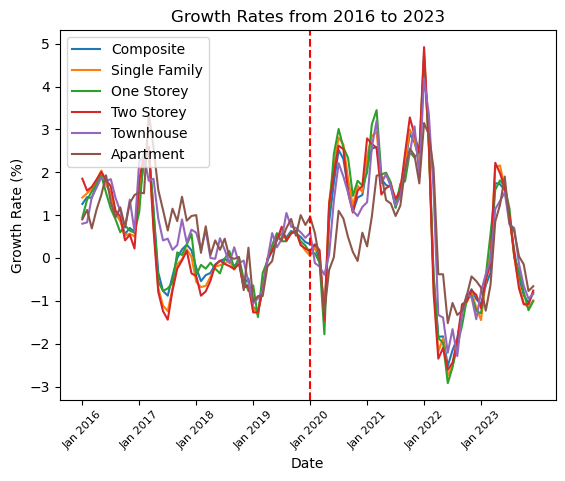

In [18]:
# plot the composite, single family, one storey, two storey, townhouse and appartment grow rate from 2016 to 2023
plt.plot(aggregate_df_2016_2023['Date'], aggregate_df_2016_2023['composite_growth_rate'], label='Composite')
plt.plot(aggregate_df_2016_2023['Date'], aggregate_df_2016_2023['single_family_growth_rate'], label='Single Family')
plt.plot(aggregate_df_2016_2023['Date'], aggregate_df_2016_2023['one_storey_growth_rate'], label='One Storey')
plt.plot(aggregate_df_2016_2023['Date'], aggregate_df_2016_2023['two_storey_growth_rate'], label='Two Storey')
plt.plot(aggregate_df_2016_2023['Date'], aggregate_df_2016_2023['townhouse_growth_rate'], label='Townhouse')
plt.plot(aggregate_df_2016_2023['Date'], aggregate_df_2016_2023['apartment_growth_rate'], label='Apartment')
plt.title('Growth Rates from 2016 to 2023')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 96, 12))
plt.axvline(x=48, color='r', linestyle='--')
plt.legend()
plt.show()

